In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('data/NHPC_Profiles-20181008000000-24329') as fi:
    hli = 0    # header line index
    rep = []
    loc_name = ''
    loc_id = ''
    date = ''
    time = ''
    
    for line in fi:
        if hli == 0:
            [loc_name, loc_id, date, time] = line.split()
            loc_id = loc_id[1:-2]
            hli = 1
            continue
            
        elif hli < 4:
            hli += 1
            continue
        
        elif line == '===\n':
            ofn = 'data/processed/' + loc_id + '_' + date + '_' + time + '.csv'
            with open(ofn, 'w') as fo:
                fo.write('Height,Frequency,Density\n')
                for ol in rep:
                    op = ''
                    for os in ol.split():
                        op += os + ','
                    fo.write(op[0:-1] + '\n')
            hli = 0
            rep.clear()
        else:
            rep.append(line)

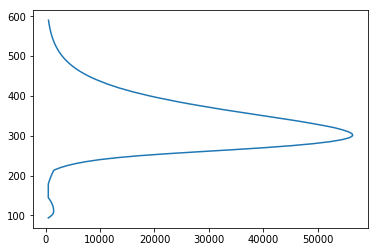

In [4]:
df = pd.read_csv('data/processed/mo155_2018-10-08_00:01:00.csv')
plt.plot(df['Density'], df['Height'])